### Replication : Long Digital ATM

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from configuration import ConfigurationBuilder
from pricing import BlackScholesMerton, GeometricBrownianMotion

In [2]:
configuration = ConfigurationBuilder(
    kind='call',
    spot=100.0,
    sigma=0.05,
    maturity=365,
    risk_free_rate=0,
    dividend_yield=0,
)

#### With Black Scholes Merton

In [3]:
shift = 1

configuration.strike = configuration.spot - shift
option_1 = BlackScholesMerton(configuration)

configuration.strike = configuration.spot 
option_2 = BlackScholesMerton(configuration)

In [4]:
digital = option_1 - option_2

In [5]:
print('price', abs(digital.price()))
print('delta', digital.delta())
print('gamma', digital.gamma())
print('vega', digital.vega())
print('theta', digital.theta())
print('rho', digital.rho())

price 0.529975495709202
delta 0.07942938379371178
gamma -0.0019870271517565957
vega -0.009935135758782965
theta 6.804887506015695e-05
rho 0.07412962883661978


#### With Geometric Brownian Motion

In [6]:
configuration.strike = configuration.spot
configuration.simulation = 10000
configuration.steps = 365
gbm_pricing = GeometricBrownianMotion(configuration)
gbm_pricing.run_simulation()

In [7]:
gbm_pricing.digital()

0.4893

### Sensitivity : Long Digital

In [8]:
init_spot = 100

data = []

for maturity, sigma in ((365, 0.2), (365, 0.05), (30, 0.20)):
    for spot in range(10, 190):
        
        # Configuration ---------------------------
        
        configuration.maturity = maturity
        configuration.sigma = sigma
        configuration.spot = spot

        # Option Strip ----------------------------

        configuration.strike = init_spot - shift
        option_1 = BlackScholesMerton(configuration)

        configuration.strike = init_spot
        option_2 = BlackScholesMerton(configuration)

        digital = option_1 - option_2

        # Retrieve Result ---------------------------

        data.append({"spot": spot,
                     "maturity": maturity,
                     "sigma": sigma,
                     "price": digital.price(),
                     "delta": digital.delta(),
                     "gamma": digital.gamma(),
                     "vega": digital.vega(),
                     "theta": digital.theta(),
                     "rho": digital.rho()})
        
data = pd.DataFrame(data)

In [9]:
data.head()

,spot,maturity,sigma,price,delta,gamma,vega,theta,rho
0,10,365,0.2,2.408694e-31,1.405530e-30,8.001271e-30,1.600254e-30,-4.384258e-32,1.381443e-31
1,11,365,0.2,5.600154e-29,2.850367e-28,1.413389e-27,3.420400e-28,-9.370960e-30,3.079402e-29
2,12,365,0.2,6.654761e-27,2.985239e-26,1.302808e-25,3.752086e-26,-1.027969e-27,3.515739e-27
3,13,365,0.2,4.569994e-25,1.822623e-24,7.061868e-24,2.386912e-24,-6.539484e-26,2.323709e-25
4,14,365,0.2,1.990965e-23,7.112296e-23,2.464767e-22,9.661887e-23,-2.647092e-24,9.758117e-24


In [10]:
reference = data[(data["maturity"]==365) & (data["sigma"]==0.2)].set_index("spot")
reference.columns =  ["reference_" + name for name in reference.columns]

short_sigma = data[(data["maturity"]==365) & (data["sigma"]==0.05)].set_index("spot")
short_sigma.columns =  ["short_sigma_" + name for name in short_sigma.columns]

short_maturity = data[(data["maturity"]==30) & (data["sigma"]==0.20)].set_index("spot")
short_maturity.columns =  ["short_maturity_" + name for name in short_maturity.columns]

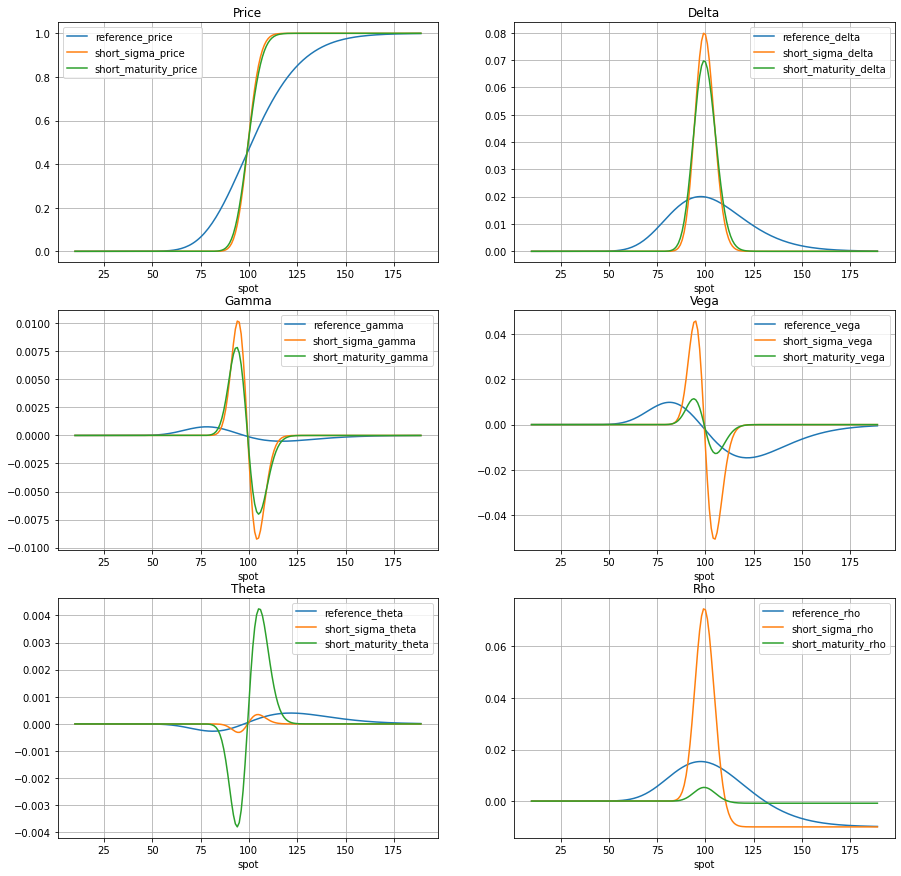

In [12]:
fig, axes = plt.subplots(nrows=3, ncols=2)

reference["reference_price"].plot(ax=axes[0,0], title='Price', grid=True, legend=True)
short_sigma["short_sigma_price"].plot(ax=axes[0,0], title='Price', grid=True, legend=True)
short_maturity["short_maturity_price"].plot(ax=axes[0,0], title='Price', grid=True, legend=True)

reference["reference_delta"].plot(ax=axes[0,1], title='Delta', grid=True, legend=True)
short_sigma["short_sigma_delta"].plot(ax=axes[0,1], title='Delta', grid=True, legend=True)
short_maturity["short_maturity_delta"].plot(ax=axes[0,1], title='Delta', grid=True, legend=True)

reference["reference_gamma"].plot(ax=axes[1,0], title='Gamma', grid=True, legend=True)
short_sigma["short_sigma_gamma"].plot(ax=axes[1,0], title='Gamma', grid=True, legend=True)
short_maturity["short_maturity_gamma"].plot(ax=axes[1,0], title='Gamma', grid=True, legend=True)

reference["reference_vega"].plot(ax=axes[1,1], title='Vega', grid=True, legend=True)
short_sigma["short_sigma_vega"].plot(ax=axes[1,1], title='Vega', grid=True, legend=True)
short_maturity["short_maturity_vega"].plot(ax=axes[1,1], title='Vega', grid=True, legend=True)

reference["reference_theta"].plot(ax=axes[2,0], title='Theta', grid=True, legend=True)
short_sigma["short_sigma_theta"].plot(ax=axes[2,0], title='Theta', grid=True, legend=True)
short_maturity["short_maturity_theta"].plot(ax=axes[2,0], title='Theta', grid=True, legend=True)

reference["reference_rho"].plot(ax=axes[2,1], title='Rho', grid=True, legend=True)
short_sigma["short_sigma_rho"].plot(ax=axes[2,1], title='Rho', grid=True, legend=True)
short_maturity["short_maturity_rho"].plot(ax=axes[2,1], title='Rho', grid=True, legend=True)


fig.set_figheight(15)
fig.set_figwidth(15);